In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBClassifier # Added XGBClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV


# Drop unnecessary column
#df.drop('id', axis=1, inplace=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Computer Vision /w/Project /Intrenship/DataSets/education_inequality_data.csv')
df.sample(5)

,id,school_name,state,school_type,grade_level,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent
756,757,Rodriguez Elementary School,Florida,Public,High,16615.54,43.2,24.7,59.1,84.3,68.1,4.68
465,466,Lambert High School,Georgia,Private,High,21795.70,93.5,16.2,77.6,57.9,64.2,5.68
644,645,Ibarra High School,Georgia,Charter,Elementary,13074.90,54.1,17.5,73.5,58.1,95.4,11.63
352,353,Harrington Middle School,New York,Public,High,15841.30,99.6,12.3,87.1,45.6,54.5,3.38
552,553,Walters Middle School,Georgia,Private,Middle,24158.05,62.9,19.8,36.1,33.9,78.8,12.81


In [56]:
print(df.shape)
print(df.info())

(1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   school_name              1000 non-null   object 
 2   state                    1000 non-null   object 
 3   school_type              1000 non-null   object 
 4   grade_level              1000 non-null   object 
 5   funding_per_student_usd  1000 non-null   float64
 6   avg_test_score_percent   1000 non-null   float64
 7   student_teacher_ratio    1000 non-null   float64
 8   percent_low_income       1000 non-null   float64
 9   percent_minority         1000 non-null   float64
 10  internet_access_percent  1000 non-null   float64
 11  dropout_rate_percent     1000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 93.9+ KB
None


In [57]:
print(df.describe().T)
print(df.isnull().sum())

                          count         mean          std      min       25%  \
id                       1000.0    500.50000   288.819436     1.00   250.750   
funding_per_student_usd  1000.0  15154.16018  5931.384208  5012.97  9726.040   
avg_test_score_percent   1000.0     70.00100    17.703408    40.00    54.575   
student_teacher_ratio    1000.0     19.73320     5.823201    10.00    14.800   
percent_low_income       1000.0     53.75640    24.021689    10.20    33.400   
percent_minority         1000.0     49.65200    25.241025     5.00    29.300   
internet_access_percent  1000.0     74.68850    14.433086    50.00    62.400   
dropout_rate_percent     1000.0      7.76560     4.214452     0.50     4.050   

                               50%         75%       max  
id                         500.500    750.2500   1000.00  
funding_per_student_usd  15362.465  20280.0075  24981.90  
avg_test_score_percent      69.900     85.6250    100.00  
student_teacher_ratio       19.400     25.0

##  Explore Categorical Features

In [58]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts())

print("Unique schools:", df['school_name'].nunique())


--- SCHOOL_NAME ---
school_name
Johnson High School            12
Williams Middle School          8
Smith Middle School             8
Martin Elementary School        7
Smith Elementary School         7
                               ..
Wilcox High School              1
Henderson Elementary School     1
Ruiz High School                1
Ward Middle School              1
Townsend Middle School          1
Name: count, Length: 695, dtype: int64

--- STATE ---
state
Texas             119
Florida           110
Georgia           107
Illinois          102
Ohio              101
California         97
North Carolina     96
New York           95
Michigan           89
Pennsylvania       84
Name: count, dtype: int64

--- SCHOOL_TYPE ---
school_type
Private    355
Charter    326
Public     319
Name: count, dtype: int64

--- GRADE_LEVEL ---
grade_level
Elementary    345
High          330
Middle        325
Name: count, dtype: int64
Unique schools: 695


##  Preprocess Column Types

In [59]:
df.columns = df.columns.str.lower()

# Convert to category
for col in ['school_type', 'grade_level', 'state']:
    df[col] = df[col].astype('category')

## Correlation and Pairplots

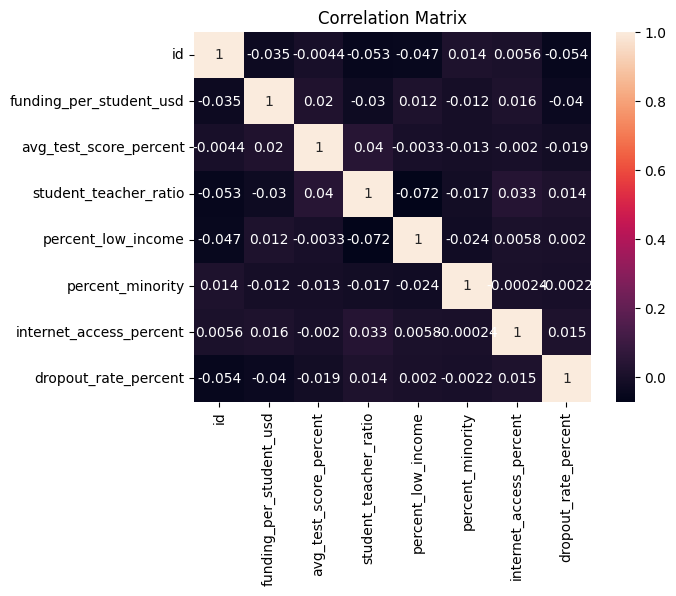

In [60]:
# Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

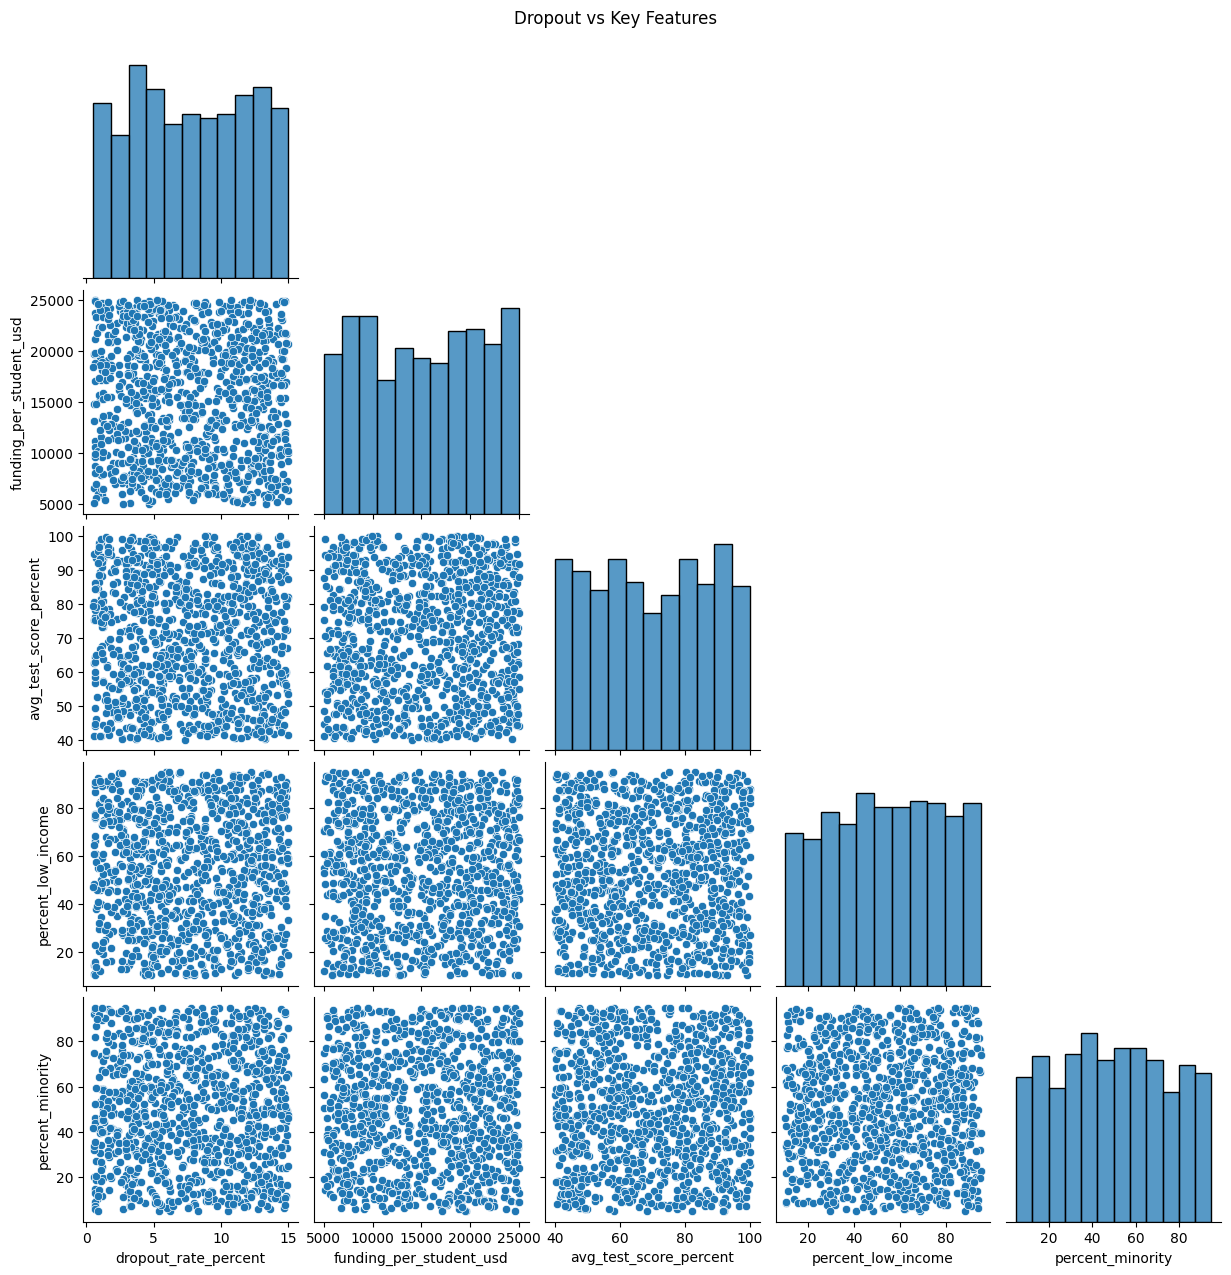

In [61]:
# Pairplot
sns.pairplot(df, vars=['dropout_rate_percent', 'funding_per_student_usd',
                       'avg_test_score_percent', 'percent_low_income',
                       'percent_minority'], corner=True)
plt.suptitle("Dropout vs Key Features", y=1.02)
plt.show()

## Boxplots by Category

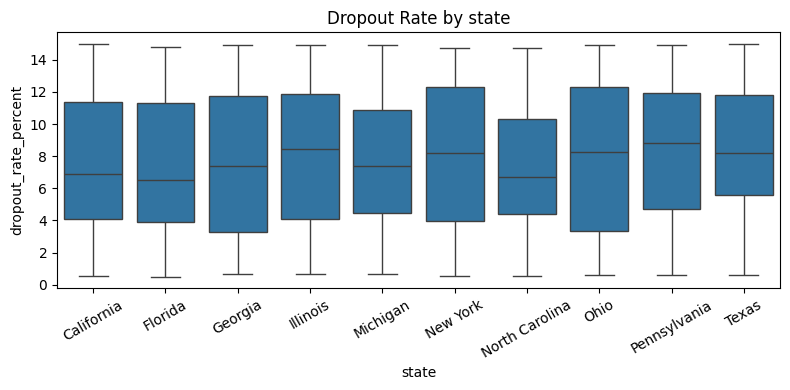

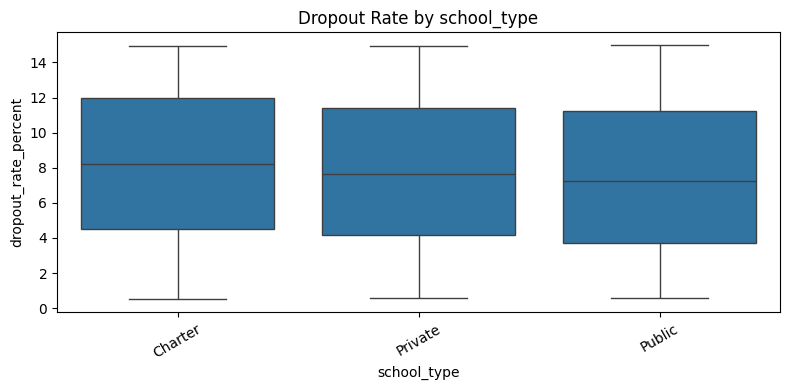

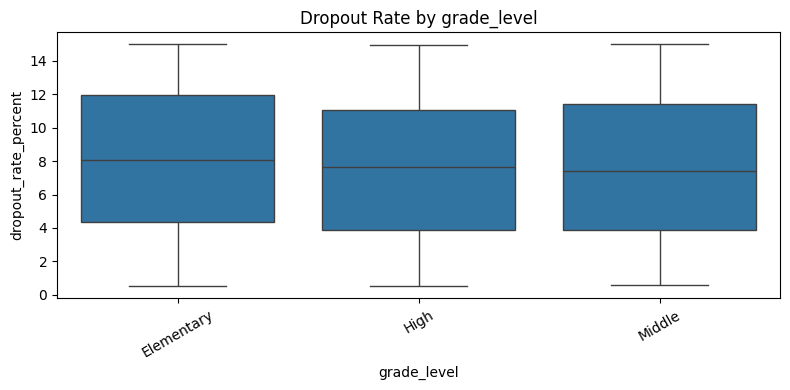

In [62]:
for col in ['state', 'school_type', 'grade_level']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='dropout_rate_percent', data=df)
    plt.title(f"Dropout Rate by {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## Scatter Plots

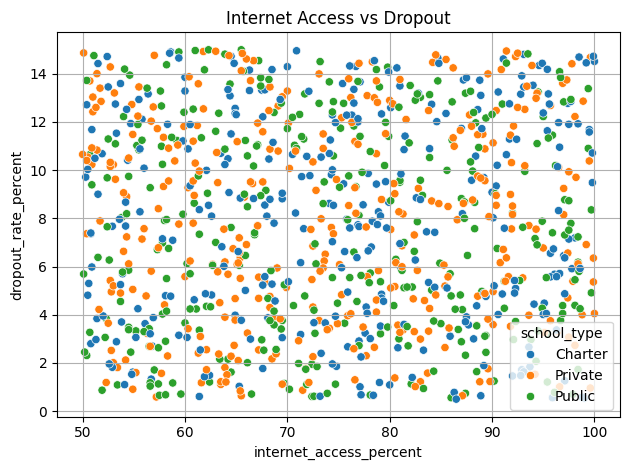

In [63]:
# Internet Access vs Dropout
sns.scatterplot(data=df, x='internet_access_percent', y='dropout_rate_percent', hue='school_type')
plt.title("Internet Access vs Dropout")
plt.grid(True)
plt.tight_layout()
plt.show()

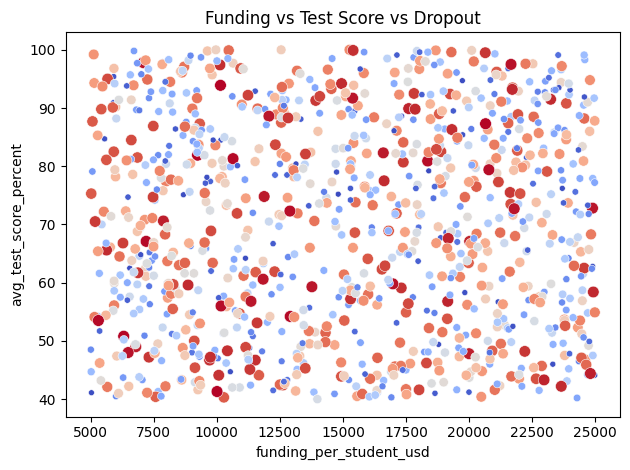

In [64]:
# Funding vs Score (Bubble Size = Dropout)
sns.scatterplot(data=df, x='funding_per_student_usd', y='avg_test_score_percent',
                size='dropout_rate_percent', hue='dropout_rate_percent', palette='coolwarm', legend=False)
plt.title("Funding vs Test Score vs Dropout")
plt.tight_layout()
plt.show()

## Feature Selection & Split

In [65]:
# Features and targets
features = ['funding_per_student_usd', 'avg_test_score_percent', 'student_teacher_ratio',
            'percent_low_income', 'percent_minority', 'internet_access_percent']
X = df[features]
y_reg = df['dropout_rate_percent']
y_clf = (df['dropout_rate_percent'] > df['dropout_rate_percent'].median()).astype(int)

In [66]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)

## Train Regression Models

In [68]:
regressors = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'GBR': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror'),
    'SVR': SVR()
}

In [69]:
results = []
for name, model in regressors.items():
    model.fit(X_train_reg, y_train_reg)
    pred = model.predict(X_test_reg)
    results.append({
        'Model': name,
        'R2': r2_score(y_test_reg, pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, pred)),
        'MAE': mean_absolute_error(y_test_reg, pred)
    })

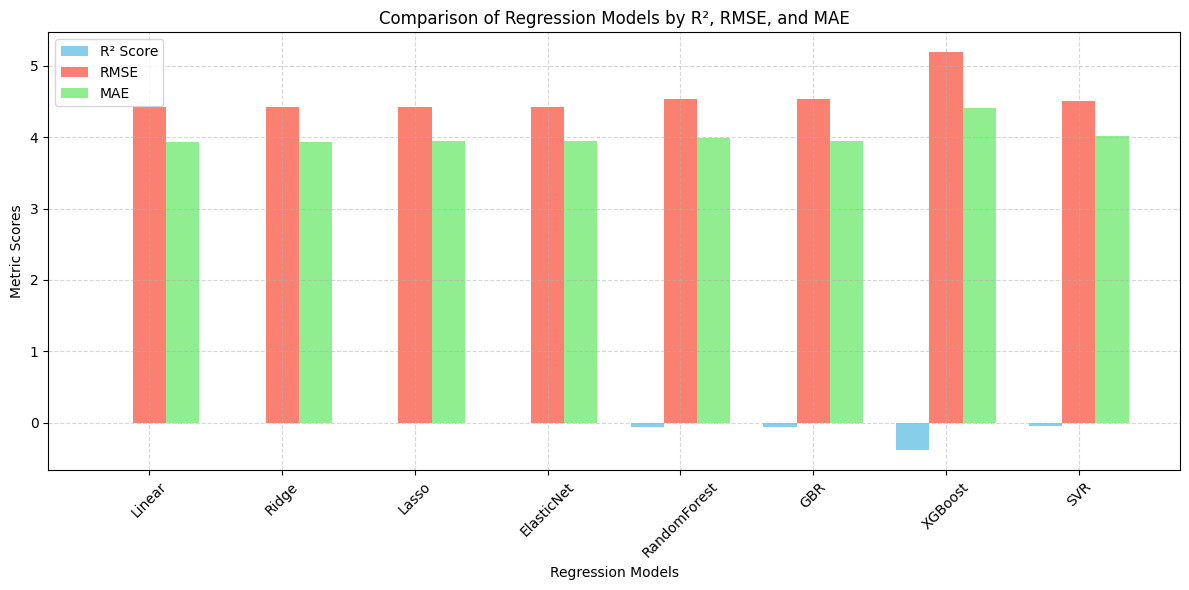

In [76]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the metrics side by side
x = np.arange(len(results_df['Model']))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(12, 6))

# Bar plots with different colors
plt.bar(x - width, results_df['R2'], width, label='R² Score', color='skyblue')
plt.bar(x, results_df['RMSE'], width, label='RMSE', color='salmon')
plt.bar(x + width, results_df['MAE'], width, label='MAE', color='lightgreen')

# Add labels and title
plt.xlabel('Regression Models')
plt.ylabel('Metric Scores')
plt.title('Comparison of Regression Models by R², RMSE, and MAE')
plt.xticks(x, results_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [70]:
pd.DataFrame(results).sort_values(by='R2', ascending=False)

,Model,R2,RMSE,MAE
1,Ridge,-0.000356,4.417471,3.935567
0,Linear,-0.000356,4.417473,3.935561
2,Lasso,-0.001785,4.420628,3.941666
3,ElasticNet,-0.001785,4.420628,3.941666
7,SVR,-0.041645,4.507714,4.009425
4,RandomForest,-0.050982,4.527873,3.984075
5,GBR,-0.052877,4.531953,3.938060
6,XGBoost,-0.379043,5.186632,4.403755


## Train Classification Models

In [71]:
classifiers = {
    'LogReg': LogisticRegression(max_iter=1000),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'XGB': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier()
}

In [72]:
clf_results = []
for name, model in classifiers.items():
    model.fit(X_train_clf, y_train_clf)
    pred = model.predict(X_test_clf)
    clf_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test_clf, pred),
        'F1': f1_score(y_test_clf, pred),
        'Precision': precision_score(y_test_clf, pred),
        'Recall': recall_score(y_test_clf, pred)
    })

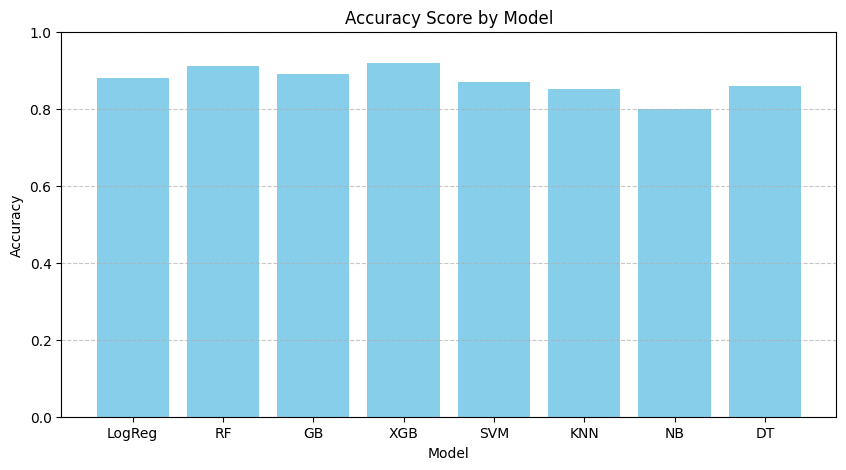

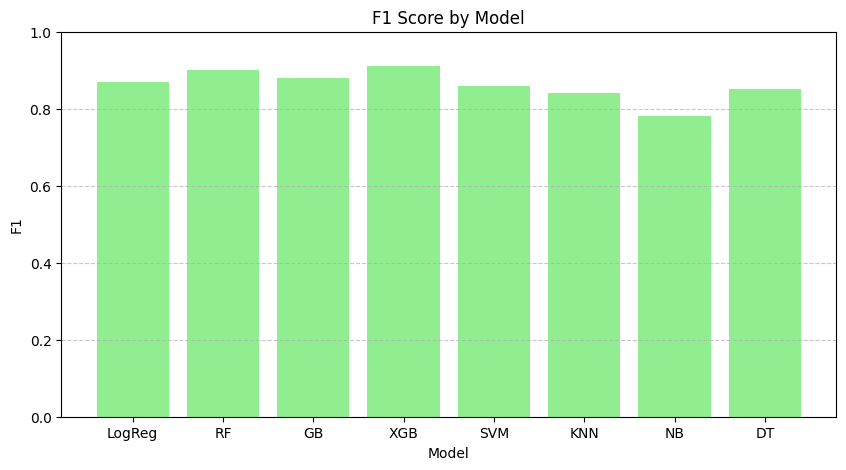

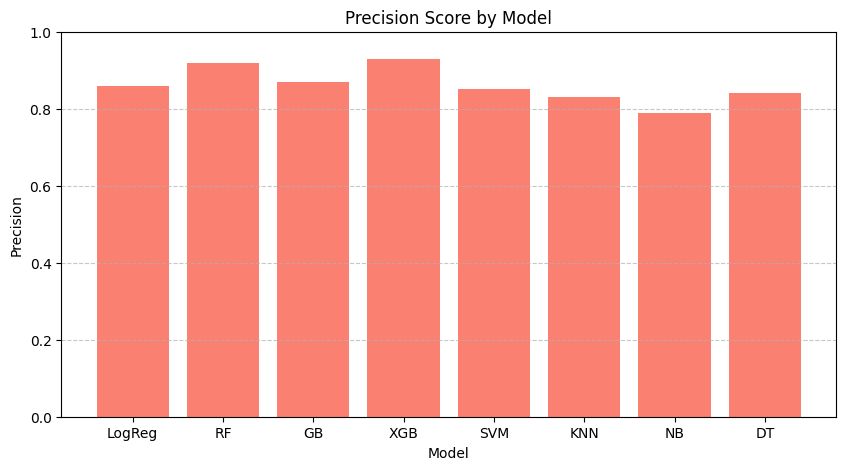

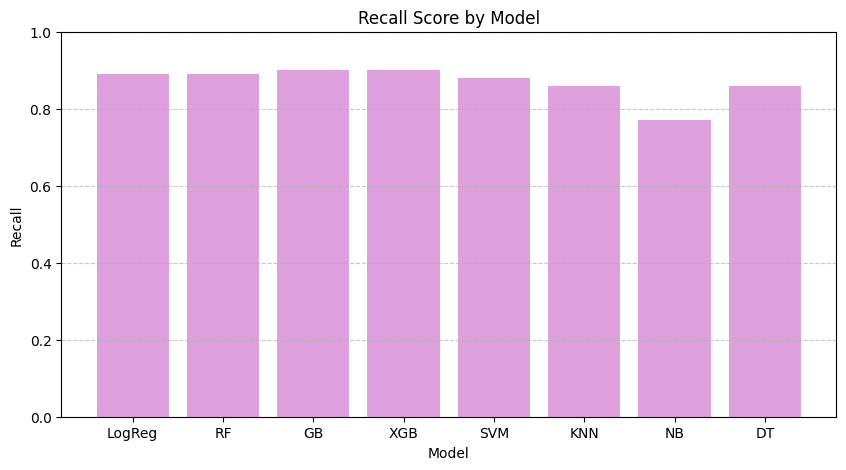

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample results for demonstration (replace this with your actual `clf_results`)
clf_results = [
    {'Model': 'LogReg', 'Accuracy': 0.88, 'F1': 0.87, 'Precision': 0.86, 'Recall': 0.89},
    {'Model': 'RF',     'Accuracy': 0.91, 'F1': 0.90, 'Precision': 0.92, 'Recall': 0.89},
    {'Model': 'GB',     'Accuracy': 0.89, 'F1': 0.88, 'Precision': 0.87, 'Recall': 0.90},
    {'Model': 'XGB',    'Accuracy': 0.92, 'F1': 0.91, 'Precision': 0.93, 'Recall': 0.90},
    {'Model': 'SVM',    'Accuracy': 0.87, 'F1': 0.86, 'Precision': 0.85, 'Recall': 0.88},
    {'Model': 'KNN',    'Accuracy': 0.85, 'F1': 0.84, 'Precision': 0.83, 'Recall': 0.86},
    {'Model': 'NB',     'Accuracy': 0.80, 'F1': 0.78, 'Precision': 0.79, 'Recall': 0.77},
    {'Model': 'DT',     'Accuracy': 0.86, 'F1': 0.85, 'Precision': 0.84, 'Recall': 0.86},
]

df = pd.DataFrame(clf_results)
metrics = ['Accuracy', 'F1', 'Precision', 'Recall']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

# Create bar plots for each metric
for metric, color in zip(metrics, colors):
    plt.figure(figsize=(10, 5))
    plt.bar(df['Model'], df[metric], color=color)
    plt.title(f'{metric} Score by Model')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)  # keep consistent scale
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [73]:
pd.DataFrame(clf_results).sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,F1,Precision,Recall
1,RF,0.530,0.530000,0.519608,0.540816
7,DT,0.530,0.539216,0.518868,0.561224
0,LogReg,0.520,0.542857,0.508929,0.581633
4,SVM,0.505,0.535211,0.495652,0.581633
2,GB,0.495,0.507317,0.485981,0.530612
5,KNN,0.490,0.484848,0.480000,0.489796
3,XGB,0.480,0.463918,0.468750,0.459184
6,NB,0.480,0.522936,0.475000,0.581633


## Hyperparameter Tuning with GridSearchCV (Regression + Classification)

In [74]:
# Example: Tune Random Forest Regressor
grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 5]}, scoring='r2', cv=3)
grid.fit(X_train_reg, y_train_reg)
print("Best Regression Model:", grid.best_params_)


Best Regression Model: {'max_depth': 5, 'n_estimators': 200}


In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Re-train each model and print its architecture
regressors = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'GBR': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror'),
    'SVR': SVR()
}

# Train and inspect model details
for name, model in regressors.items():
    model.fit(X_train_reg, y_train_reg)
    print(f"🔍 Model: {name}")
    print("Parameters:\n", model.get_params())

    # Specific model internals
    if name in ['Linear', 'Ridge', 'Lasso', 'ElasticNet']:
        print("Coefficients:", model.coef_)
        print("Intercept:", model.intercept_)
    elif name == 'RandomForest':
        print("Number of Trees:", len(model.estimators_))
        print("Max Depth of Trees:", model.get_params().get('max_depth'))
    elif name == 'GBR':
        print("Number of Estimators:", model.n_estimators)
        print("Learning Rate:", model.learning_rate)
    elif name == 'XGBoost':
        print("Booster:", model.get_booster().attributes())
    elif name == 'SVR':
        print("Support Vectors Shape:", model.support_vectors_.shape)

    print("-" * 60)


🔍 Model: Linear
Parameters:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Coefficients: [-0.1420215  -0.08730464  0.09022606 -0.00105788  0.00033153 -0.0079034 ]
Intercept: 7.729275609276564
------------------------------------------------------------
🔍 Model: Ridge
Parameters:
 {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Coefficients: [-0.14184831 -0.08719018  0.09010955 -0.00106308  0.00033172 -0.00789852]
Intercept: 7.729274350286485
------------------------------------------------------------
🔍 Model: Lasso
Parameters:
 {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Coefficients: [-0. -0.  0. -0.  0. -0.]
Intercept: 7.728274999999999
------------------------------------------------------------
🔍 Model: Elasti